# Topic 3 - Potential flow

This notebook is a potential flow calculator that you can use to put in differnet flow elements, move them around, visualise flow and pressure coefficients. This will enable you to get a feel for how to do superposition of different flow elements to create a variety of new flows!

We will be using $z$ as the vertical direction and $x$ as the streamwise direction. For a right-hand rule, this means that positive $y$ axis is into the plane of the paper. This means the vertical velocity is $w$ and the streamwise velocity is $u$. 


In the cells below, we initialise the domain and then define 4 most important flow elements. 

#### 1) Uniform flow 
#### 2) Source/Sink 
#### 3) Doublet
#### 4) Vortex

All other potential flows are just a combination of these 4 elements. Once you have combined the flow elements, then you can get a new streamfunction. 

The streamline itself is represented by the streamfunction.  Note that the streamline is always tangetial to the velocity field. Therfore, the slope of the streamline at any given point $(x,z)$ is represented by the $\frac{dz}{dx}$. 

### For a streamline: $\frac{dz}{dx} = \frac{w}{u}$

where $w$ and $u$ are the velocity components along $z$ and $x$ direction.


In [45]:
import numpy as np
import matplotlib.pyplot as plt

## Initialise the domain

In the code below, we intialise the domain size for out potential flow. We are given a max and min value for the domain size in two directions. We are also defining the spacing between subsequent points in the domain. Then, we are create an array for $x$ and $z$ with the corresponding spacing. Finally, we are creating a mesh with the meshgrid command that gives you a 2D grid that we are going to use for all calculations and plotting. 

In [46]:
Domain_x_min = -4 #The min range of the x axis
Domain_x_max = 4 #The max range of the x axis
Domain_z_min = -4 #The min range of the z axis
Domain_z_max = 4 #The max range of the z axis

dx = dz = 0.2 # This sets the spacing between successive points in the domain
#Note that you can change the spacing as you wish. 
#For Numerical methods, this spacing is really important!
#Finer spacing leads to more accurate results but takes longer for computation

#This command makes 1-D array (or vectors) for x and z axis
xa= np.arange(Domain_x_min,Domain_x_max+dx,dx) 
za= np.arange(Domain_z_min,Domain_z_max+dz,dz) 

#This command makes a mesh (2-D array) that is now our domain
x,z = np.meshgrid(xa,za)

#All our flow solutions will be computed in this grid

## COMPUTING VELOCITIES

In this notebook, we will only be using cartesian coordinate system. Therefore, all velocities are computed in the cartesian coordinate system. Eventhough some streamfunctions are derived in polar coordinates in the lectures, we convert everything to cartesian coordinates to help with the coding. However, analytically, given a function in polar coordinates, you should be able to differentiate and get the velocities. 

In cartesian coordinate system:

### $u = \frac{\partial \psi}{\partial z}$ and $w = -\frac{\partial \psi}{\partial x}$ 


In polar coordinate system:

### $V_r = \frac{1}{r}\frac{\partial \psi}{\partial \theta}$ and $V_\theta = -\frac{\partial \psi}{\partial r}$ 

Note that you can also convert from cartesian to polar using simple trignometric relations: 
$u = V_r cos\theta - V_\theta sin\theta$ and $w = V_r sin\theta + V_\theta cos\theta$

In some cases, it is tedious to do this conversion. 

In this notebook, we are going to use numpy to calculate the gradients numerically instead of analytically. This is because, we can then just compute the values of streamfunction on a cartesian grid and numerically differentiate that along the different directions to get the gradients and therefore velocities. 

The function np.gradient function returns a array with the first row has the gradient along the $z$ direction and the second row has the gradient along the $x$ direction. Note that the way the gradient return the value is flipped. So, you get the gradient along $z$ first and then along $x$.  We can then just assign the corresponding row to get the $u$ and the $w$ component as done below.

Further information on  np.gradient is available here https://numpy.org/doc/stable/reference/generated/numpy.gradient.html

In [47]:
 #The input for this function is the streamfunction
def findvelocities(psi):
    #This command computes the w and u components of velocity as gradient(psi)
    #As seen earlier, the gradient along the columns is taken in first and then the rows...
    #The function gradient computes the first derivative of a variable along a given axis. 
    u,w = np.gradient(psi)
    
    u = u/dz
    w = -1*w/dx 
    
    return [u,w]

Once you have the velocities, you can use the Bernoulli's equation and get the pressure at a given point: 

### $p = p_\infty + \frac{1}{2}\rho U^2_\infty - \frac{1}{2}\rho(u^2 + w^2)= p_\infty + \frac{1}{2}\rho U^2_\infty - \frac{1}{2}\rho(V^2_r + V^2_\theta)$

#### This above equation can be re-written to get the pressure coefficient $C_p = \frac{p-p_\infty}{\frac{1}{2}\rho U^2_\infty}$

### From this, we get $C_p = 1 - \frac{u^2+w^2}{U_\infty} = 1 - \frac{u^2_r+u^2_\theta}{U_\infty}$

In some flows, there may not be a freestream velocity. In that case, we use a Reference velocity (which should be known to compute the pressure gradient). In the function below, we are using this reference velocity to compute pressure coefficient. If you have a freestream velocity, then, $U_{ref} = U_\infty$

This pressure coefficient will be available at every point in the grid. That means, we can get the value of pressure and velocity at everypoint in the grid.

In [48]:
def findpressure(u,w,Uref):
     #This command computes the pressure coefficient from the dynamic pressure
    Cp = 1-((u**2+w**2)/Uref**2) 
    return Cp

# BUILDING BLOCKS (or LEGO Bricks)

# Uniform flow
This function create the streamfunction for uniform flow. 

U is the horizontal speed and W is the vertical speed.

If you have magnitude $U_\infty$ and angle $\alpha$ then U = $U_\infty cos(\alpha)$ and W = $U_\infty sin(\alpha)$. 

Note that $\alpha$ is just $tan^{-1}(W/U)$

### The stream function in cartesian coordinates is given by: $\psi = Uz - Wx$

### The stream function in polar coordinates is given by: $\psi = Ursin\theta - Wrcos\theta$

For polar coordinates: The positive radial direction is still pointing outwards from the centre and the positive tangential direction is in the counter-clockwise direction. 

In [49]:
#The input are Uinf and angle alpha (alpha is in degrees)
def uniform_flow(Uinf,alpha):
   #This command is the stream function for Uniform flow
    psiu = Uinf*np.cos(np.pi*alpha/180)*z - Uinf*np.sin(np.pi*alpha/180)*x 
    
    return psiu

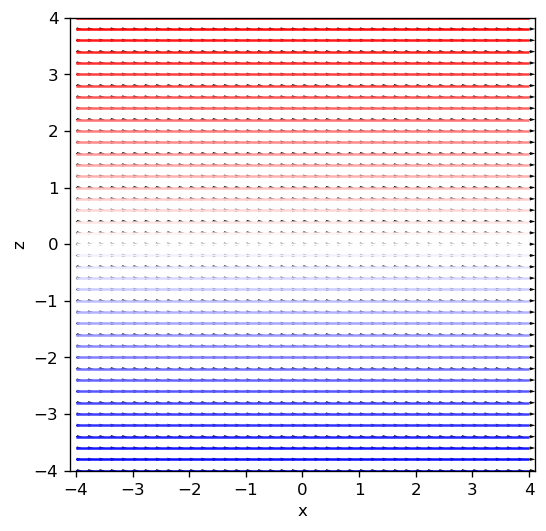

In [50]:
#This is a dummy run to just show uniform flow
Uinf = 10
alpha = 0

psi = uniform_flow(Uinf,alpha) 
[u,w] = findvelocities(psi)

    
plt.figure(figsize=(5,5),dpi=120)       # make the plot
plt.contour(x,z,psi,50,cmap='bwr')                  # streamlines
plt.quiver(x,z,u,w)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

# Source or Sink

The function in the cell below will create the streamfunction for a point source or a sink. 
A source or a sink has a strength $Q$ (where Q> 0 is a source and Q<0 is a sink).

The streamfunction for a source/sink is given by: 

## $\psi(r,\theta) = \frac{Q \theta}{2\pi}$

The angle $\theta$ is the angle made by any given point in the grid with the location of the source. In a cartesian grid, this source or sink can be located at a point ($x_0,z_0$). If $x_0$ = 0 and $z_0$ = 0, then the source/sink is at the origin. You can move the location of the source and sink by changing the value of $x_0$ and $z_0.

The radial location of a point $(x,z)$ away from the source/sink located at $(x_0,z_0)$ is given by, 

## $r = \sqrt{(x-x_0)^2 + (z-z_0)^2}$ and the angle of that point $\theta$ = $tan^{-1}(\frac{z-z_0}{x-x_0})$

The $\theta$ in the streamfunction is the same theta that identified the point $(x,z)$. So, if you have a value of the point $(x,z)$ and know the location of source/sink $(x_0,z_0)$,then you can find the streamfunction (and hence the streamlines) that represent the flow in cartesian coordinates

To convert the streamfunction given above in to cartesian coordinates, you just need to enter the values for $\theta$ and $r$ in terms of $x$ and $z$. 

## $\psi(x,z) = \frac{Q}{2\pi}tan^{-1}(\frac{z-z_0}{x-x_0})$


Do move the point $(x_0,z_0)$ and see what happens!!

You can also add multiple sources and sinks in to the flow and see what happens. For example, you can create the flow past an oval by putting one source and one sink separated by some distance.


In [51]:
#The input to this function is the strength and the location (x0,y0) of source/sink
def source(Q,x0,z0):
    #This command finds the radial coordinate r from the cartesian coordinate
    #relative to this specific flow element
    r = np.sqrt((x-x0)**2+(z-z0)**2) 
    
    #This command finds the tangential angle theta from the cartesian coordinate
    #relative to this specific flow element
    theta = np.arctan2(z-z0,x-x0) 
    
    #This command is the stream function for source/sink
    psis = Q*theta/(2*np.pi) 
    
    return psis

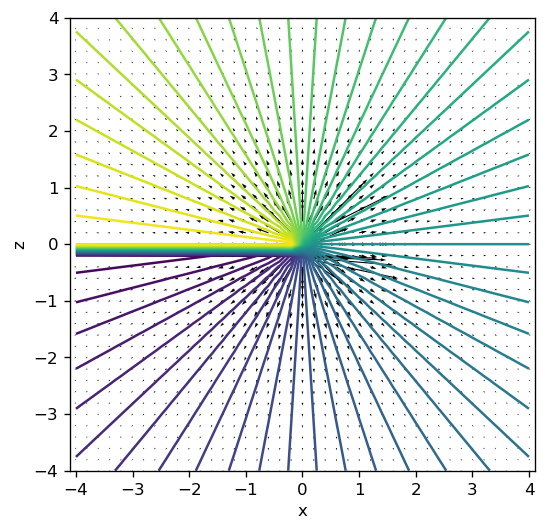

In [52]:
#This is a run cell to just show source/sink

psi = source(5,0,0)
[u,w] = findvelocities(psi)
    
plt.figure(figsize=(5,5),dpi=120)       # make the plot
plt.contour(x,z,psi,50)                  # streamlines
plt.quiver(x,z,u,w)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

## Doublet

A double is basic flow element that combines the presence of a source and sink that are separated by infinitisimally small distance. The source and sink have equal strength ($Q$ and $-Q$). They are separated by a distance $l$. The doublet is defined as a flow element where the product of $Q$ and $l$ tends to a finite value when $l$ tends to zero. Therefore, we can define $\kappa$ = $Ql$.

The function in the cell below will create the streamfunction for a Doublet.
A Doublet has a strength $\kappa$.

The streamfunction for a Doublet is given by: 

## $\psi(r,\theta) = -\frac{\kappa}{2\pi}\frac{sin\theta}{r}$

The angle $\theta$ is the angle made by any given point in the grid with the location of the doublet. In a cartesian grid, this doublet can be located at any point ($x_0,z_0$). If $x_0$ = 0 and $z_0$ = 0, then the doublet is at the origin. You can move the location of the doublet by changing the value of $x_0$ and $z_0$.

The radial location of a point $(x,z)$ away from the doublet located at $(x_0,z_0)$ is given by, 

## $r = \sqrt{(x-x_0)^2 + (z-z_0)^2}$ and the angle of that point $\theta$ = $tan^{-1}(\frac{z-z_0}{x-x_0})$

The $\theta$ in the streamfunction is the same theta that identified the point $(x,y)$. To convert the streamfunction given above in to cartesian coordinates, you just need to enter the values for $sin\theta$ and $r$ in terms of $x$ and $z$. 

### Note that $sin\theta = \frac{z-z_0}{\sqrt{(x-x_0)^2 + (z-z_0)^2}}$

## $\psi(x,z) = -\frac{\kappa}{2\pi}\frac{z-z_0}{(x-x_0)^2 + (z-z_0)^2}$

The sign of $\kappa$ determines the alignment of source and sink. If the source is to the left of the sink, then, $\kappa$ is positive. This will ensure that the flow goes away from the doublet on the left and come towards the doublet on the right. If the source is to the right of the sink, then, $\kappa$ will be negative. This will ensure that the flow goes away from the doublet on the right and come towards the doublet on the left.

Do move the point ($x_0,z_0$) and see what happens!!

In [53]:
#The input to this function is the strength and the location (x0,y0) of the doublet
def doublet(Kappa,x0,z0):
    #This command finds the radial coordinate r from the cartesian coordinate
    #relative to this specific flow element
    r = np.sqrt((x-x0)**2+(z-z0)**2) 
    
    #This command finds the tangential angle theta from the cartesian coordinate
    #relative to this specific flow element
    theta = np.arctan2(z-z0,x-x0) 
    
    #This command is the stream function for source/sink 
    psid = -Kappa*(z-z0)/(2*np.pi*r*r) 
    
    return psid

(-4, 4)

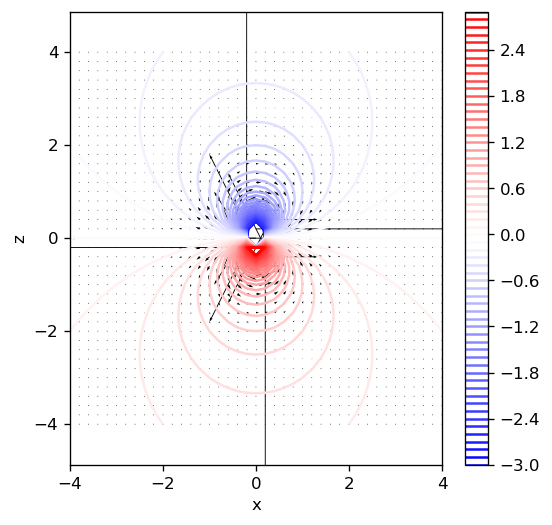

In [54]:
#Here we demonstrate a doublet
kappa = 2*np.pi

psi = doublet(kappa,0,0)
[u,w] = findvelocities(psi)
Cp = findpressure(u,w,Uinf)

#We are computing the body here based on theory...

plt.figure(figsize=(5,5),dpi=120)       # make the plot
plt.contour(x,z,psi,np.arange(-3,3,.1),cmap='bwr')      # streamlines
plt.colorbar()
plt.quiver(x,z,u,w,scale=50)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('z')
plt.xlim([-4, 4])
plt.ylim([-4, 4])

# Vortex

The function in the cell below will create the streamfunction for a point vortex. 
A vortex has a strength $\Gamma$ = $\int \vec{V}\cdot\vec{ds}$

The main thing for you to remember is that $\Gamma$ is positive in the clockwise direction (even through positive $\theta$ direction is counterclockwise). For the cartesian coordinate system we are using, positive $y$ axis is in to the plane of the paper and $\Gamma$ has to be positive in the clockwise direction to satisfy the right-hand rule. 

The streamfunction for a vortex is given by: 

## $\psi = \frac{\Gamma}{2\pi} ln(r)$

### Really important to note that positive value of $\Gamma$ means that the vortex is spinning in the clockwise direction. 

The angle $\theta$ is the angle made by any given point in the grid with the location of the vortex. In a cartesian grid, this vortex can be located at a point ($x_0,z_0$). If $x_0$ = 0 and $z_0$ = 0, then the vortex is at the origin. You can move the location of the vortex by changing the value of $x_0$ and $z_0$.

The radial location of a point $(x,z)$ away from the vortex located at $(x_0,z_0)$ is given by, 

## $r = \sqrt{(x-x_0)^2 + (z-z_0)^2}$ and the angle of that point $\theta$ = $tan^{-1}(\frac{z-z_0}{x-x_0})$

The $r$ in the streamfunction is the same $r$ that identified the point $(x,y)$ relative to $(x_0,z_0)$. So, if you have a value of the point $(x,z)$ and know the location of vortex $(x_0,z_0)$, then you can find the streamfunction (and hence the streamlines) that represent the flow.

Do move the point ($x_0,z_0$) and see what happens!!

In [55]:
#The input to this function is the circulation and the location (x0,y0) of the vortex
def vortex(Gamma,x0,z0):
    
    #This command finds the radial coordinate r from the cartesian coordinate
    #relative to this specific flow element
    r = np.sqrt((x-x0)**2+(z-z0)**2) 
    
    #This command finds the tangential angle theta from the cartesian coordinate
    #relative to this specific flow element
    theta = np.arctan2(z-z0,x-x0)  
    
    #This command is the stream function for a vortex
    psiv = Gamma*np.log(r)/(2*np.pi) 
   
    return psiv

(-4, 4)

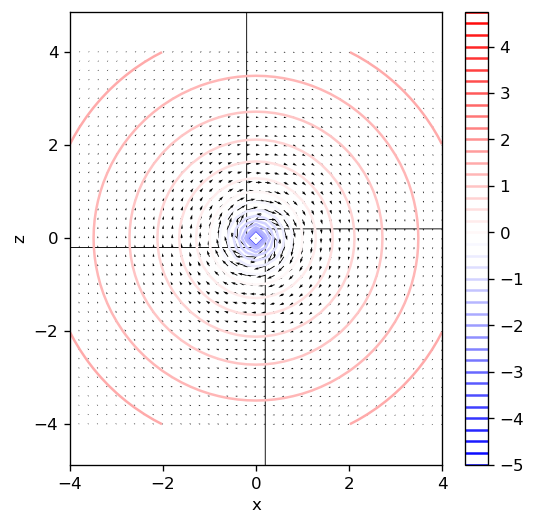

In [56]:
#Here we demonstrate a vortex
Gamma = 2*np.pi

psi = vortex(Gamma,0,0)
[u,w] = findvelocities(psi)
Cp = findpressure(u,w,Uinf)

#We are computing the body here based on theory...

plt.figure(figsize=(5,5),dpi=120)       # make the plot
plt.contour(x,z,psi,np.arange(-5,5,0.25),cmap='bwr')      
plt.colorbar()
plt.quiver(x,z,u,w,scale=50)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('z')
plt.xlim([-4, 4])
plt.ylim([-4, 4])

# Superposition and Representing different shapes using streamlines

We are going to create new flows by superposition of the basic flow elements. To do this, we just need to add the streamfunctions of the different flow elements to create a new streamfunction. Once, you have this streamfunction, you can plot streamlines, compute velocities and pressures. 

### $\psi = \psi_1 + \psi_2 + \psi_3 +...$

For example, $\psi_1$ can be a uniform flow and $\psi_2$ can be a source. This gives you a rankine half body!
We will expand on this below. 

It should be noted here that any streamline in the flow can be considered as a solid surface. This is because there is no flow normal to the streamline. This would be identical to a solid surface in an inviscid flow where you cannot have flow cross a solid surface. Therefore, to represent a given geometry, all we need to do is identify a specific streamline that best represents the geometry we want to see. Then, we can call the streamline that looks like the geometry as the object. Then, we can get flow pattern (streamlines) and the velocities past a give body if we looked around that specific streamline. 

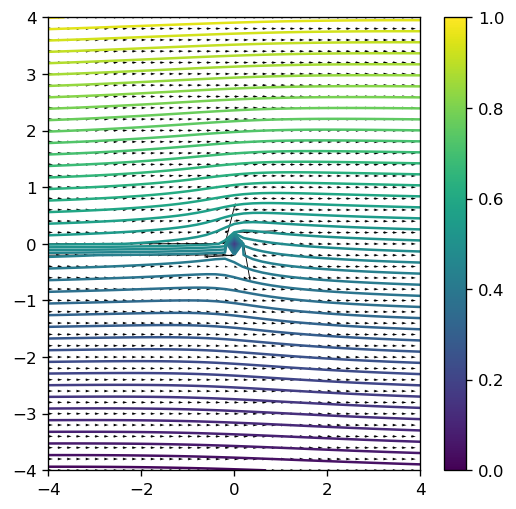

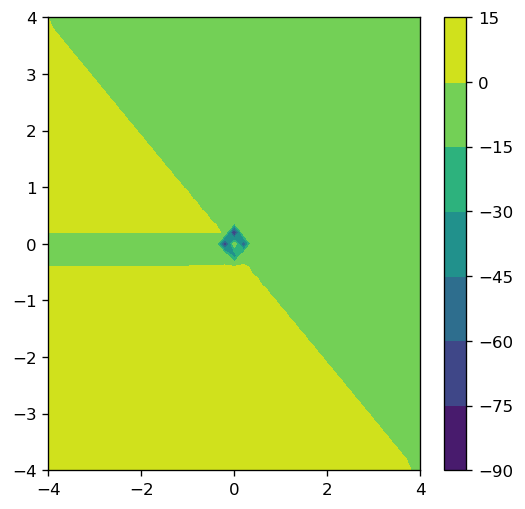

In [57]:
#YOUR CODE HERE TO PLAY AROUND WITH THE VARIOUS FLOW ELEMENTS!!!
#HERE I AM DOING A UNIFORM FLOW + VORTEX + SOURCE 
Uinf = 5
alpha = 0
Q = np.pi
Gamma = np.pi
x0= 0
z0 = 0

psi = uniform_flow(Uinf,alpha) + vortex(Gamma,x0,z0)+ source(Q,x0,z0)

[u,w] = findvelocities(psi)
Cp = findpressure(u,w,Uinf)

plt.figure(figsize=(5,5),dpi=120)
plt.contour(x,z,psi,50) 
plt.quiver(x,z,u,w)
plt.colorbar()


plt.figure(figsize=(5,5),dpi=120)
plt.contourf(x,z,Cp) 
plt.colorbar()

## Example 1 - Rankine body flow

The first example for superposition is a Rankine half body.  Here, $\psi_1$ is a uniform flow and $\psi_2$ is a source. This gives you a rankine half body! You can change the strength of source relative to uniform flow to generate the size of the body. In fact, it can be shown that that the full height of the body $2h = \frac{Q}{U_\infty}$

### $\psi_{rankine} = \psi_{uniform flow} + \psi_{source}$

It is important to remember to use the formulae either all in cartesian coordinates or all in cylindrical coordinates. Do not mix and match!


(-4, 4)

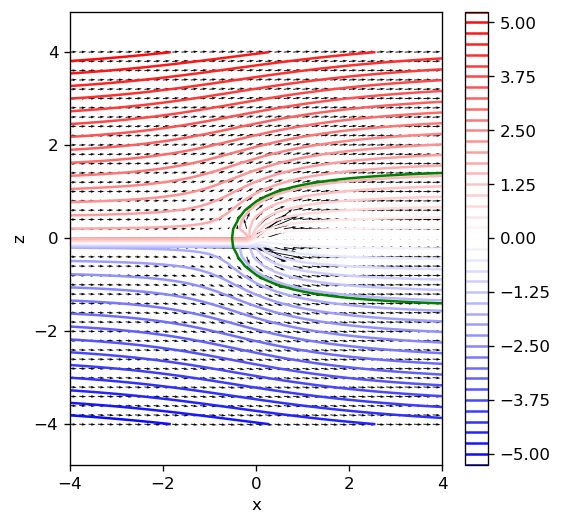

In [58]:
#This cell block will give us the flow past rankine half body.
#Change the values of Uinf and Q to get different bodies.
Uinf = 1
alpha = 0
Q = np.pi

psi = uniform_flow(Uinf,alpha)+ source(Q,0,0)

[u,w] = findvelocities(psi)
Cp = findpressure(u,w,Uinf)

plt.figure(figsize=(5,5),dpi=120)       # make the plot
plt.contour(x,z,psi,50,cmap='bwr')      # streamlines
plt.colorbar()
plt.quiver(x,z,u,w,scale=50)
plt.contour(x,z,abs(psi),levels = [0.5*Q],colors='g')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('z')
plt.xlim([-4, 4])
plt.ylim([-4, 4])

total height of hill:  [3.141]


(-4, 4)

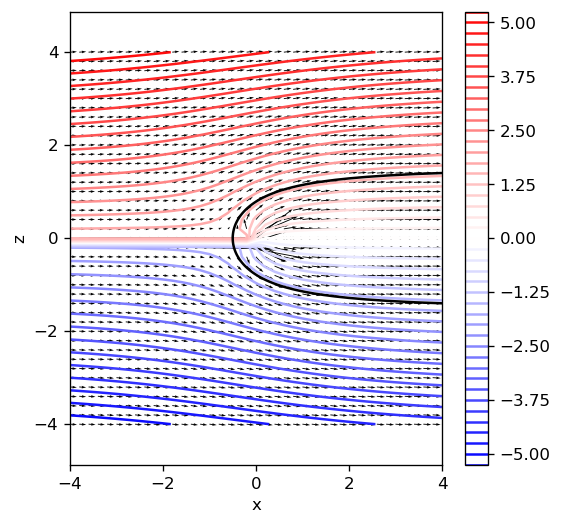

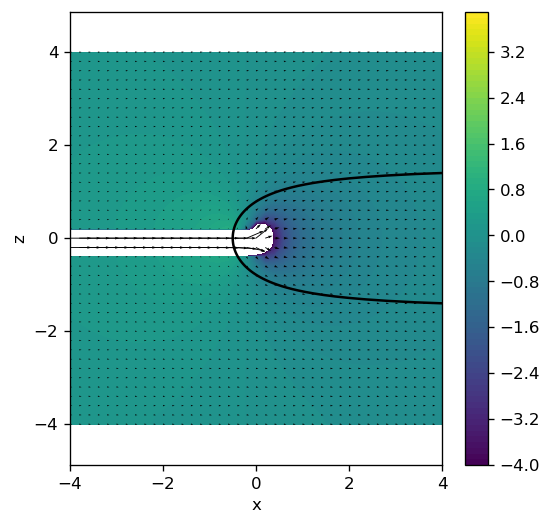

In [59]:
#We are computing the body here based on theory...
theta = np.linspace(0.001,2*np.pi-0.001,100)
r = 0.5*Q*(1-theta/np.pi)/(Uinf*np.sin(theta))

xb = r*np.cos(theta)
zb = r*np.sin(theta)

#This plots the streamlines and vectors again
plt.figure(figsize=(5,5),dpi=120)       # make the plot
plt.contour(x,z,psi,50,cmap='bwr')      # streamlines
plt.colorbar()
plt.quiver(x,z,u,w,scale=50)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('z')
plt.xlim([-4, 4])
plt.ylim([-4, 4])

#This plots the body based on the calculation...
plt.plot(xb,zb,'k-')

#Find the value of "2h" by computing "z" coordinate value at theta = 0. 
#We cannot evaluate it at 0 but at a value very close to it.  
idx = np.where(theta==0.001)
tot_h = 2*zb[idx[0]]
print("total height of hill: ",np.round(tot_h,3))


#Plotting the pressure coefficient as contours
plt.figure(figsize=(5,5),dpi=120)
plt.contourf(x,z,Cp,np.arange(-4,4,0.1))
plt.colorbar()
plt.quiver(x,z,u,w,scale=150)
plt.plot(xb,zb,'k-')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('z')
plt.xlim([-4, 4])
plt.ylim([-4, 4])

Let's compute the velocity and pressure at a given point. From the slides, it asks for these values on the dividing streamline at x = 0. 

This location has a corresponding value of $z$. This value can be evaluated analytically as $z = \pm \frac{Q}{4U_\infty}$

Let's find the velocities and pressure at these points in two different ways and this will demonstrate the accuracy of the different methods:

First, let us find the index that corresponds to the specifix (x,z) location and print the values of velocities and pressure at that point. We will do this with out tried and tested $np.where$. 

Second, let's use the interpolation function and find the velocities and pressure coefficient at those points. 

We can then compare the two results

In [60]:
#Finding values of velocity and pressure at specific coordinates...
#We need to find values at x = 0 and z = Q/(4*Uinf)
xl = 0 
zl = Q/(4*Uinf) 

#np.where method

#This finds x-index for the location
idx = np.where(xa>=xl)[0]
pointx = idx[0]

#This finds the z-index for the loaction
idz = np.where(za>=zl)[0]
pointz = idz[0]

#This prints the pressure at the location
#Note the z-index is the first one and x-index is the second
print("u velocity = ",np.round(u[pointz,pointx],3))
print("w velocity = ",np.round(w[pointz,pointx],3))
print("Cp = ",np.round(Cp[pointz,pointx],3))


u velocity =  1.0
w velocity =  0.612
Cp =  -0.375


In [61]:
#Finding values of velocity and pressure at specific coordinates...
#We need to find values at x = 0 and z = Q/(4*Uinf)
xl = 0 
zl = Q/(4*Uinf) 

#Interpolation method

from scipy import interpolate

fun =  interpolate.interp2d(x,z,u,kind='quintic') # kind could be {'linear', 'cubic', 'quintic'}
ul = fun(xl,zl) #This interpolates the values of the function f in the new set of points. 
print("u velocity = ",np.round(ul,3))

fun =  interpolate.interp2d(x,z,w,kind='quintic') # kind could be {'linear', 'cubic', 'quintic'}
wl = fun(xl,zl) #This interpolates the values of the function f in the new set of points. 
print("w velocity = ",np.round(wl,3))

Cpl = findpressure(ul,wl,Uinf)
print("Pressure coefficient = ",np.round(Cpl,3))

u velocity =  [1.012]
w velocity =  [0.623]
Pressure coefficient =  [-0.412]


/Users/bgs1n09/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=5,5 nx,ny=34,24 m=1681 fp=4.537836 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


The two sets of numbers are close. However, if you change the value of $Q$ or $U_\infty$, you might not get an accurate value. Specifically, the interpolation method might not be very accurate. This is because the resolution of the grid is not good enough. We need more points in order to evaluate the velocities and pressure at the exact location on the streamline. In this case, the interpolation will work well. Currently, the interpolation is struggling for other values of $Q$ and $U_\infty$!

I suggest you try with improving the resolution and evaluating pressure and velocities at those points. 
See which methods gets closer to the theory!

Note that as you improve the resolution, the evaluations will take longer.

### DON'T PANIC!!

## Example 2 - Flow over circle (Cylinder in 2D)

We now superimpose a uniform flow with a doublet at the origin. This gives a flow over a circle. 

### $\psi = U_\infty rsin\theta -\frac{\kappa}{2\pi}\frac{sin\theta}{r}$

Use this $\psi$ to get the velocities ($V_r$ and $V_\theta$) and then set them to zero to find the stagnation point. It is intuitively clear that stagnation point has to be on the $x-axis$ for which $\theta$ = 0 and $\pi$. 

You will also get $r = \sqrt{\kappa/2\pi U_\infty}$

This tells you that the size of the circle depends on both $\kappa$ and $U_\infty$. 

If you plug in these values of $r$ and $\theta$ in to the equation for streamfunction, then, we get the value of streamfunction (or streamline) that represents the body as $\psi = 0$. So, we just need to identify the streamline corresponding to $\psi = 0$ to find the body. 

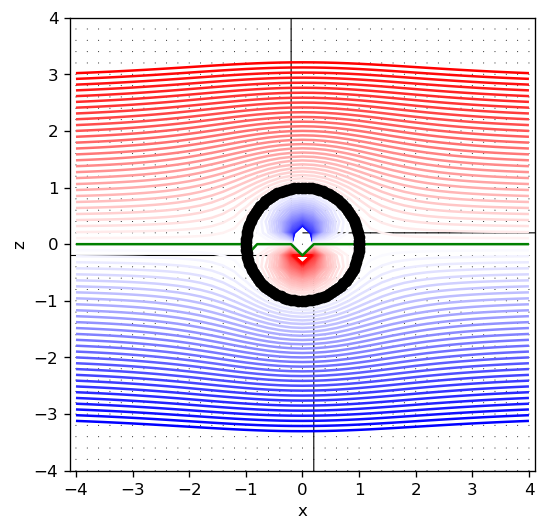

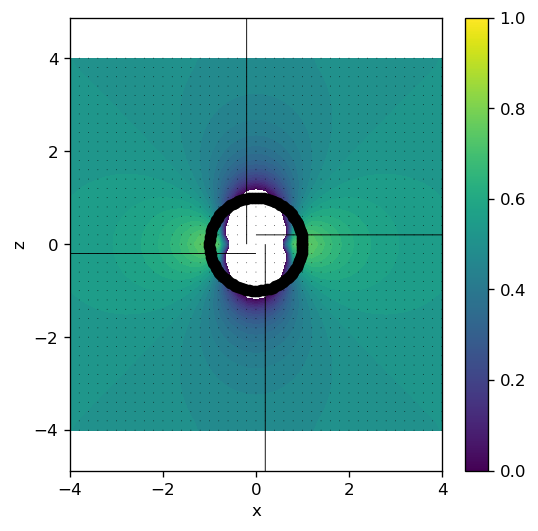

In [62]:
Uinf = 1
alpha = 0
Kappa = 2*np.pi
psi = uniform_flow(Uinf,alpha) + doublet(kappa,0,0)

[u,w] = findvelocities(psi)
Cp = findpressure(u,w,Uinf)

#We need to determine the circle streamline...
r = np.sqrt(Kappa/(2*np.pi*Uinf))
theta = np.linspace(0,2*np.pi,100)
xb = r*np.cos(theta)
zb = r*np.sin(theta)

plt.figure(figsize=(5,5),dpi=120)
plt.contour(x,z,psi,np.arange(-3,3,.1),cmap='bwr')
plt.contour(x,z,psi,levels = [0],colors='green')
plt.plot(xb,zb,'ko')
plt.quiver(x,z,u,w)
plt.xlabel('x')
plt.ylabel('z')
plt.axis('equal')
plt.show()

plt.figure(figsize=(5,5),dpi=120)
plt.contourf(x,z,Cp,np.arange(-2,2,0.1))
plt.quiver(x,z,u,w)
plt.xlabel('x')
plt.ylabel('z')
plt.plot(xb,zb,'ko')
plt.axis('equal')
plt.colorbar()
plt.show()

### Example 3 - Rankine full body flow

The second example for superposition is a Rankine full body.  Here, $\psi_1$ is a uniform flow, $\psi_2$ is a source and $\psi_3$ is a sink. This gives you a rankine full body! You can change the strength of source/sink relative to uniform flow to generate the size of the body. 

### $\psi_{rankine full body} = \psi_{uniform flow} + \psi_{source} + \psi_{sink}$

It is important to remember to use the formulae either all in cartesian coordinates or all in cylindrical coordinates. Do not mix and match!


(-4, 4)

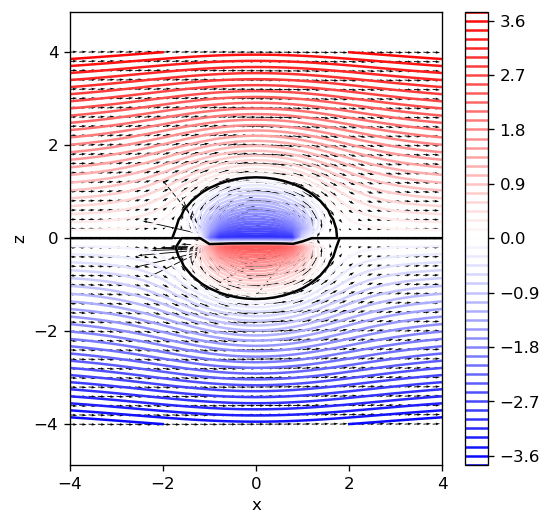

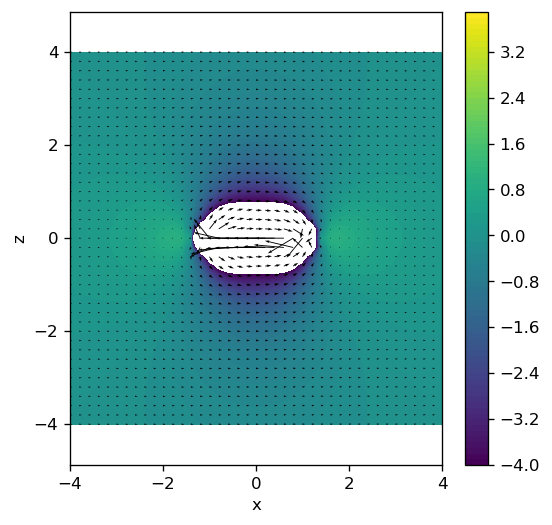

In [63]:
#This cell block will give us the flow past rankine half body.
#Change the values of Uinf and Q to get different bodies.
Uinf = 1
alpha = 0
Q = 2*np.pi
b = 1

psi = uniform_flow(Uinf,alpha)+ source(Q,-b,0) + source(-Q,b,0)
[u,w] = findvelocities(psi)
Cp = findpressure(u,w,Uinf)

#We are computing the body here based on theory...

plt.figure(figsize=(5,5),dpi=120)       # make the plot
plt.contour(x,z,psi,50,cmap='bwr')      # streamlines
plt.colorbar()
plt.quiver(x,z,u,w,scale=50)
plt.contour(x,z,psi,levels = [0],colors='black')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('z')
plt.xlim([-4, 4])
plt.ylim([-4, 4])


plt.figure(figsize=(5,5),dpi=120)
plt.contourf(x,z,Cp,np.arange(-4,4,0.1))
plt.colorbar()
plt.quiver(x,z,u,w,scale=150)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('z')
plt.xlim([-4, 4])
plt.ylim([-4, 4])

We can use $fsolve$ to solve the equation numerically and determine the dividing streamline. We already know from theory that the dividing streamline is in fact $\psi = 0$. Therefore, we solve for various values of $z$ given a range of input values of $x$ such tha $psi$ = 0.

It should be noted that any streamline can represent a solid surface. Therefore, we can compute a different shaped surface/body by picking another streamline. So, in the $fsolve$ below, the value of $\psi_b$ represents the value of the streamline that we are solving for. Since, the solution is symmetric, we just mirror the value of $z_{top}$ to get the value at the bottom. However, we can just look at flow in one-half of the domain. In that, case, the problem becomes a flow over a hill of a given size. We need to apply the boundary conditions to figure out the size of the hill (just as we did for rankine half-body).  

(-4, 4)

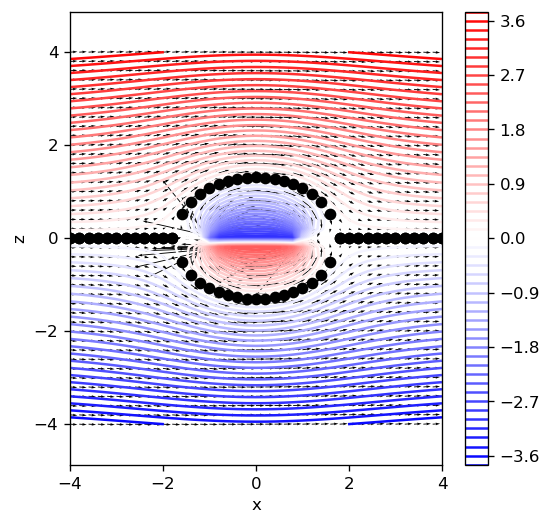

In [64]:
#Calculate the dividing streamline coordinates using fsolve 
xb = xa #These are the x values that we want the solutions
b = 1
from scipy.optimize import fsolve

#We define the function of the streamline that are solving for...
def rankine_oval(zbody):
    return Uinf*zbody + (0.5*Q/np.pi)*np.arctan2(zbody,xb+b)-(0.5*Q/np.pi)*np.arctan2(zbody,xb-b)

zt = fsolve(rankine_oval,xb) # solves for top part of the ellipse
zb = -zt; #We mirror it for the bottom part

plt.figure(figsize=(5,5),dpi=120)       # make the plot
plt.contour(x,z,psi,50,cmap='bwr')      # streamlines
plt.plot(xb,zt,'ko')
plt.plot(xb,zb,'ko')
plt.colorbar()
plt.quiver(x,z,u,w,scale=50)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('z')
plt.xlim([-4, 4])
plt.ylim([-4, 4])

## Example 4 - Lifting flow over circle (Cylinder in 2D)

We now superimpose a uniform flow with a doublet at the origin and we add a vortex to it. This gives a lifting flow over a circle. 

### $\psi = U_\infty rsin\theta -\frac{\kappa}{2\pi}\frac{sin\theta}{r} + \frac{\Gamma}{2\pi} ln(r)$

It would be very helpful if the radius of the circle does not change when we change the strength of the vortex. Moreover, it would ideal if the streamline that captures the circle does not change if we change the vortex.

This can be easily achieved by just adding a constant to the above equation and find the value of that constant for $\psi = 0$. Note that when the vortex strength is zero, the streamline that captures the body is $\psi = 0$. This exercise will ensure that the streamline that captures the body remains the same!


You will also get $\epsilon = -\frac{\Gamma}{2\pi} ln R$ where $R = \sqrt{\kappa/2\pi U_\infty}$


So, the streamfunction becomes: $\psi = U_\infty rsin\theta (1 - R^2/r^2) + \frac{\Gamma}{2\pi} ln(r/R)$



If you plug in these values of $r$ and $\theta$ in to the equation for streamfunction, then, we get the value of streamfunction (or streamline) that represents the body as $\psi = 0$. So, we just need to identify the streamline corresponding to $\psi = 0$ to find the body. 

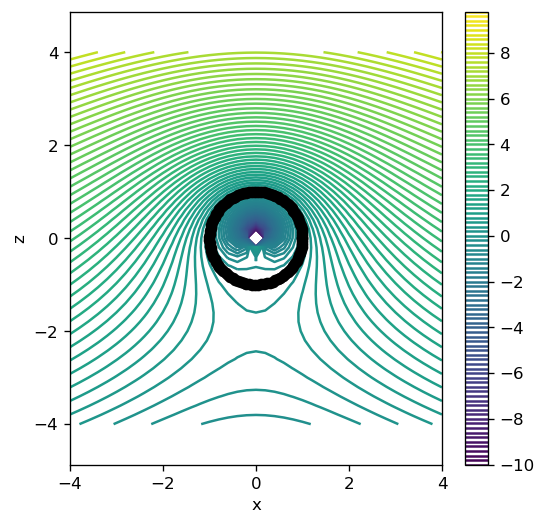

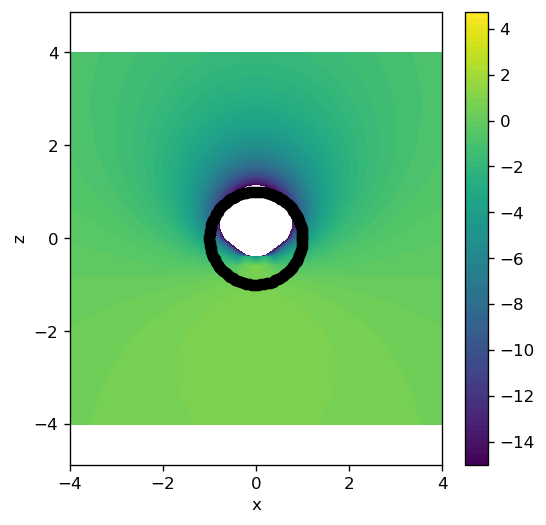

In [65]:
Uinf = 1
Kappa = 2*np.pi

R = np.sqrt(Kappa/(2*np.pi*Uinf))

Gamma = 5*np.pi*R*Uinf

#Note that Gamma = 4*np.pi*R*Uinf is a critical value for the circulation where the stagnation points meet!

psi =  uniform_flow(Uinf,0) + doublet(Kappa,0,0) + vortex(Gamma,0,0)

[u,w] = findvelocities(psi)
Cp = findpressure(u,w,Uinf)

#We need to determine the circle streamline...
r = np.sqrt(Kappa/(2*np.pi*Uinf))
theta = np.linspace(0,2*np.pi,100)
xb = r*np.cos(theta)
zb = r*np.sin(theta)

plt.figure(figsize=(5,5),dpi=120)
plt.contour(x,z,psi,np.arange(-10,10,0.2))
plt.plot(xb,zb,'ko')
plt.xlabel('x')
plt.ylabel('z')
plt.axis('equal')
plt.colorbar()
plt.show()

plt.figure(figsize=(5,5),dpi=120)
plt.contourf(x,z,Cp,np.arange(-15,5,0.25))
plt.plot(xb,zb,'ko')
plt.xlabel('x')
plt.ylabel('z')
plt.axis('equal')
plt.colorbar()
plt.show()

## Method of Images

Method of Images is about enforcing a specific streamline to be a ground plane. This invovles making sure that there is "no-normal" at that plane. This is tpyically done by adding an "image" flow element that opposes the flow at a given plane. Sometimes this "image" flow element has an opposite sign to ensure the "no-normal" flow condition and at other times it could have the same sign. This changes depending on the situation. Typically, sources/sinks do not have to change sign but Doublets and vortices will have to change signs.


Once you have placed the right flow elements in appropriate places, then, you can find the streamfunction corresponding to the surface based on where the normal flow is zero. This streamline will only have tangential velocity along that plane. If you know the location and compute the tangential velocity, you can also get the pressure distribution along the plane. 

### Example (5 & 6)

In this example, we have a vortex near the ground. This can be a lifting body near the ground (such a a quadrotor or race-car wing). 

This same superposition also gives flow over a vertical ellipse (This is not method of images, but, a way to generate vertically oriented elliptical shapes).

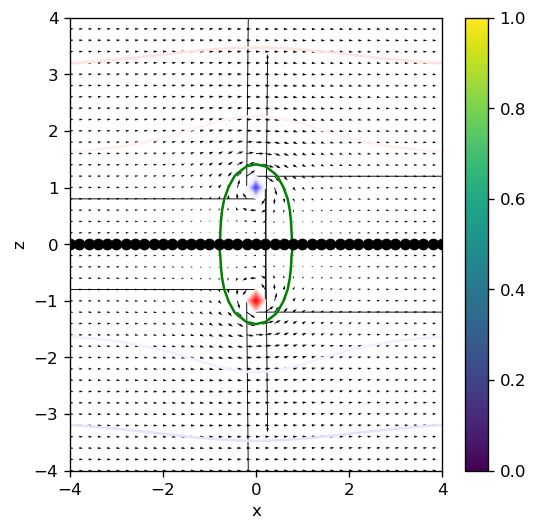

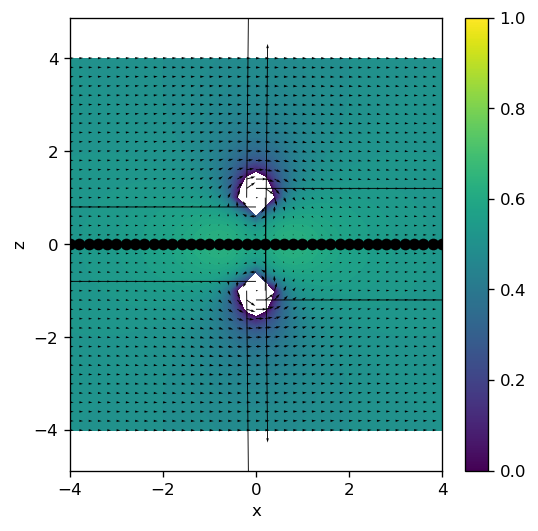

In [66]:
Uinf = 1
alpha = 0
Gamma = 5
a = 1

psi = uniform_flow(Uinf,alpha) + vortex(Gamma,0,a) + vortex(-Gamma,0,-a)

[u,w] = findvelocities(psi)
Cp = findpressure(u,w,Uinf)

plt.figure(figsize=(5,5),dpi=120)
plt.contour(x,z,psi,50,cmap='bwr') 
plt.contour(x,z,psi,levels = [0],colors='green')
plt.plot(xa,np.zeros(len(xa)),'ko')

plt.quiver(x,z,u,w)
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar()
plt.show()

plt.figure(figsize=(5,5),dpi=120)
plt.contourf(x,z,Cp,np.arange(-4,4,0.1))
plt.plot(xa,np.zeros(len(xa)),'ko')
plt.quiver(x,z,u,w)
plt.xlabel('x')
plt.ylabel('z')
plt.axis('equal')
plt.colorbar()
plt.show()

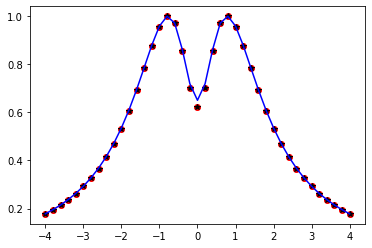

In [67]:
#Now let's figure out the pressure at the ground plane...
#We know that the ground plane is at z = 0 across all x
idx = np.where(za>=0)[0]
#The very first element of this vector should be where z = 0
wall_index = idx[0]

#Note that "z" indices are the rows and "x" indices are the columns
plt.plot(xa,Cp[wall_index,:],'ro')

#This is an alternate way to find the pressure at the wall
#Here we interpolate the pressure using interpolate function...

fun =  interpolate.interp2d(x,z,Cp,kind='quintic') # kind could be {'linear', 'cubic', 'quintic'}
Cpl = np.zeros(len(xa))
for i in range(0,len(xa)):
        #This command interpolates the pressure at the desired coordinates
        Cpl[i] = fun(xa[i],0)

plt.plot(xa,Cpl,'k*')
      
#Lets find the value from analytical derivation for z = 0        
Uinf = 1
alpha = 0
Gamma = 5
a = 1
pp = -((Gamma**a)/(np.pi*Uinf*(xa**2+a**2)))**2 + 2*Gamma*a/(np.pi*Uinf*(xa**2+a**2))

plt.plot(xa,pp,'b-')

In the above figure, we have compared three different methods of getting the pressure. 
First, we plot find the index corresponding to a location and plot the pressure coefficient at that index (this is using the $np.where$ method). Second, we use the interpolation and plotting the pressure based on the interpolation data. Finally, we plot the theoretical value as derived in the lecture slides. 
You can see that all three methods give us a very close answer. 

However, I caution here that this is for this grid and resolution. If you changed the grid and resolution, this agreement will change. Specifically, the interpolation method might have agree with the other two methods. 

Go ahead and try with changing the grid and resolution and see what happens!